# Data Mining — Linear Regression — Mini-Project 1 (Energy Consumption)

**Course:** [CSEN911] Data Mining (Winter 2025)  
**Instructor:** Dr. Ayman Alserafi  
**Due:** 24 October 2025, 11:59 PM

**Dataset:** `energy_data.csv`  


> **Instructions:** For every step, write your own explanations and justifications and visualization in the provided Markdown prompts.




***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Farida Ibrahim Ikram

ID: 58-0558

Tutorial: 7

---

Name: Abdelrahman Atwan

ID: 58-1797

Tutorial: 7

---


The dataset contains building-level energy readings and contextual attributes.

Each row represents a building observation. Columns include:

<div style="font-size:20px;">

| **Column** | **Description** |
|-------------|-----------------|
| **Building_ID** | Unique identifier for each building record. Used to distinguish one building entry from another. |
| **Building_Type** | Category describing the primary use of the building (e.g., Residential, Commercial, Industrial, Educational, etc.). |
| **Governorate** | The administrative region (governorate) where the building is located (e.g., Cairo, Giza, Alexandria). |
| **Neighborhood** | The smaller district or local area within the governorate where the building is located. |
| **Day_of_Week** | The day on which the energy consumption measurement was recorded (e.g., Sunday, Monday, etc.). |
| **Occupancy_Level** | The relative number of occupants or activity level in the building, typically categorized as *Low*, *Medium*, or *High*. |
| **Appliances_Usage_Level** | Indicates how intensively appliances are used in the building *Low*, *Medium*, or *High*. |
| **SquareFootage** | The total floor area of the building (numeric). Serves as a proxy for building size, often influencing energy usage. |
| **Last_Maintenance_Date** | The date of the last maintainance done on the building. |
| **Average_Temperature** | The average ambient temperature (in °C) recorded during the data period. |
| **Energy_Consumption** | The total energy used by the building, typically measured in kilowatt-hours (kWh).|

</div>


## Importing Libraries & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('energy_data.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/energy_data.csv')

df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [ ]:
# Inspect the dataset: df.info() shows structure and missing values, df.describe() shows summary statistics for numeric columns.
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Building_ID             1100 non-null   object 
 1   Building_Type           990 non-null    object 
 2   Governorate             873 non-null    object 
 3   Neighborhood            1100 non-null   object 
 4   Day_of_Week             1100 non-null   object 
 5   Occupancy_Level         1100 non-null   object 
 6   Appliances_Usage_Level  1100 non-null   object 
 7   SquareFootage           1100 non-null   object 
 8   Last_Maintenance_Date   1100 non-null   object 
 9   Average_Temperature     990 non-null    float64
 10  Energy_Consumption      1100 non-null   object 
dtypes: float64(1), object(10)
memory usage: 94.7+ KB


,Average_Temperature
count,990.000000
mean,33.499404
std,10.703806
min,-4.910000
25%,29.422500
50%,35.260000
75%,39.970000
max,50.000000


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [ ]:
# Filling missing values in 'Building_Type' and 'Governorate' with the mode
for col in ['Building_Type', 'Governorate']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Standardizing text in 'Day_of_Week'
df['Day_of_Week'] = df['Day_of_Week'].str.capitalize()

# Cleaning 'SquareFootage' and convert to numeric
df['SquareFootage'] = df['SquareFootage'].astype(str).str.replace('m2', '', regex=False).str.replace(',', '', regex=False)
df['SquareFootage'] = pd.to_numeric(df['SquareFootage'])

# Cleaning 'Energy_Consumption' and convert to numeric
df['Energy_Consumption'] = df['Energy_Consumption'].astype(str).str.replace('kWh', '', regex=False).str.strip()
df['Energy_Consumption'] = pd.to_numeric(df['Energy_Consumption'])

# Converting 'Last_Maintenance_Date' to datetime
df['Last_Maintenance_Date'] = pd.to_datetime(df['Last_Maintenance_Date'], errors='coerce')

# Cleaning Neighborhood column
df['Neighborhood'] = df['Neighborhood'].str.extract('([a-zA-Z\\s]+)', expand=False).str.strip()

#Filling in missing values in temperature using interpolation, and if NaN remains at group boundaries, fill with group mean
df['Average_Temperature'] = (df.groupby('Governorate')['Average_Temperature'].transform(lambda x: x.interpolate().fillna(x.mean())))

# Display the changes
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Building_ID             1100 non-null   object        
 1   Building_Type           1100 non-null   object        
 2   Governorate             1100 non-null   object        
 3   Neighborhood            1100 non-null   object        
 4   Day_of_Week             1100 non-null   object        
 5   Occupancy_Level         1100 non-null   object        
 6   Appliances_Usage_Level  1100 non-null   object        
 7   SquareFootage           1100 non-null   int64         
 8   Last_Maintenance_Date   1100 non-null   datetime64[ns]
 9   Average_Temperature     1100 non-null   float64       
 10  Energy_Consumption      1100 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 94.7+ KB


,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,Wednesday,High,Low,7063,2020-01-01,28.61000,2713.95
1,BLD-1001-AX,Commercial,Giza,Mohandessin,Tuesday,High,High,44372,2022-02-24,33.68536,5744.99
2,BLD-1002-IH,Industrial,Cairo,New Cairo,Sunday,Medium,Low,19255,2021-02-22,37.88000,4101.24
3,BLD-1003-HE,Residential,Alexandria,Dokki,Tuesday,Low,High,13265,2023-07-30,35.06000,3009.14
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82000,3279.17


In [ ]:
# Feature Engineer the columns first and then drop what's unnecessary

# Feature Engineering Day_Type Column
weekend_days = ['Friday', 'Saturday']
df['Day_type'] = df['Day_of_Week'].apply(lambda x: 'weekend' if x in weekend_days else 'weekday')

# Feature Engineering: Days_since_last_maintenance using today's date as the reference point
today = pd.Timestamp.today()
df['Days_since_last_maintenance'] = (today - df['Last_Maintenance_Date']).dt.days

#Dropping unnecessary columns
df.drop(['Building_ID', 'Last_Maintenance_Date'], axis=1, inplace=True)

# Display the changes
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Building_Type                1100 non-null   object 
 1   Governorate                  1100 non-null   object 
 2   Neighborhood                 1100 non-null   object 
 3   Day_of_Week                  1100 non-null   object 
 4   Occupancy_Level              1100 non-null   object 
 5   Appliances_Usage_Level       1100 non-null   object 
 6   SquareFootage                1100 non-null   int64  
 7   Average_Temperature          1100 non-null   float64
 8   Energy_Consumption           1100 non-null   float64
 9   Day_type                     1100 non-null   object 
 10  Days_since_last_maintenance  1100 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 94.7+ KB


,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Average_Temperature,Energy_Consumption,Day_type,Days_since_last_maintenance
0,Residential,Alexandria,Smouha,Wednesday,High,Low,7063,28.61000,2713.95,weekday,2123
1,Commercial,Giza,Mohandessin,Tuesday,High,High,44372,33.68536,5744.99,weekday,1338
2,Industrial,Cairo,New Cairo,Sunday,Medium,Low,19255,37.88000,4101.24,weekday,1705
3,Residential,Alexandria,Dokki,Tuesday,Low,High,13265,35.06000,3009.14,weekday,817
4,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,28.82000,3279.17,weekday,1169


## Exploratory Data Analysis



**Q1:** What are the most popular neighborhoods? plot all and order them on the graph (mention top 3)

**Visualization**

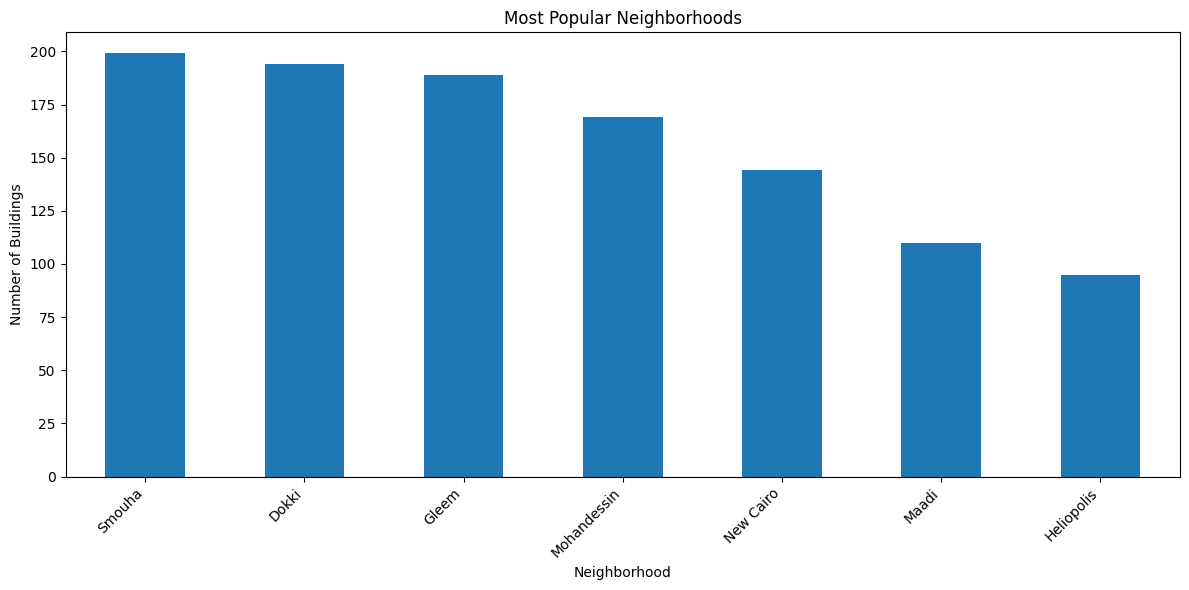

Top 3 most popular neighborhoods:
Neighborhood
Smouha    199
Dokki     194
Gleem     189
Name: count, dtype: int64


In [ ]:
# Get the value counts for the 'Neighborhood' column and select the top 10
neighborhood_counts = df['Neighborhood'].value_counts()

# Plot the top 10 neighborhood counts
plt.figure(figsize=(12, 6))
neighborhood_counts.plot(kind='bar')
plt.title('Most Popular Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Buildings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the top 3 neighborhoods
print("Top 3 most popular neighborhoods:")
print(neighborhood_counts.head(3))

**Answer for Q1:**

Top 3 most popular neighborhoods:
Neighborhood
Smouha    199
Dokki     194
Gleem     189
Name: count, dtype: int64

**Q2:** Show the distribution of the energy consumption of each Building type.

Which type have the widest distribution of energy consumption?

Which (on average) has the highest consumption?.

**Visualization**

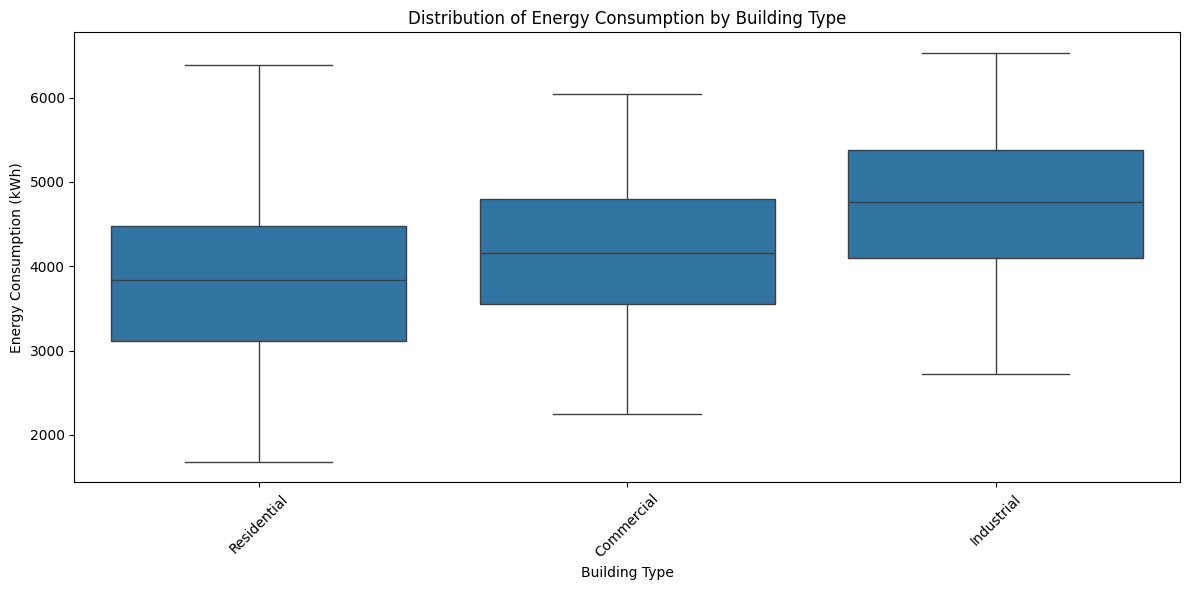


Energy Consumption Statistics by Building Type:
                      mean         std
Building_Type                         
Residential    3794.724183  885.779287
Industrial     4708.418671  818.158005
Commercial     4170.374462  809.695114


In [ ]:
# Visualize the distribution of energy consumption for each building type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Building_Type', y='Energy_Consumption', data=df)
plt.title('Distribution of Energy Consumption by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Energy Consumption (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the standard deviation and mean of energy consumption for each building type
energy_consumption_by_building_type = df.groupby('Building_Type')['Energy_Consumption'].agg(['mean', 'std']).sort_values(by='std', ascending=False)

print("\nEnergy Consumption Statistics by Building Type:")
print(energy_consumption_by_building_type)

# Shows the distribution of energy consumption per building type using a boxplot and computes the mean and standard deviation to identify the type with the widest distribution and highest average consumption.


**Answer for Q2:**



Energy Consumption Statistics by Building Type:
                      mean         std
Building_Type                         
Residential    3794.724183  885.779287
Industrial     4708.418671  818.158005
Commercial     4170.374462  809.695114

**Q3:** How does the building size affect energy consumption?

**Visualization**

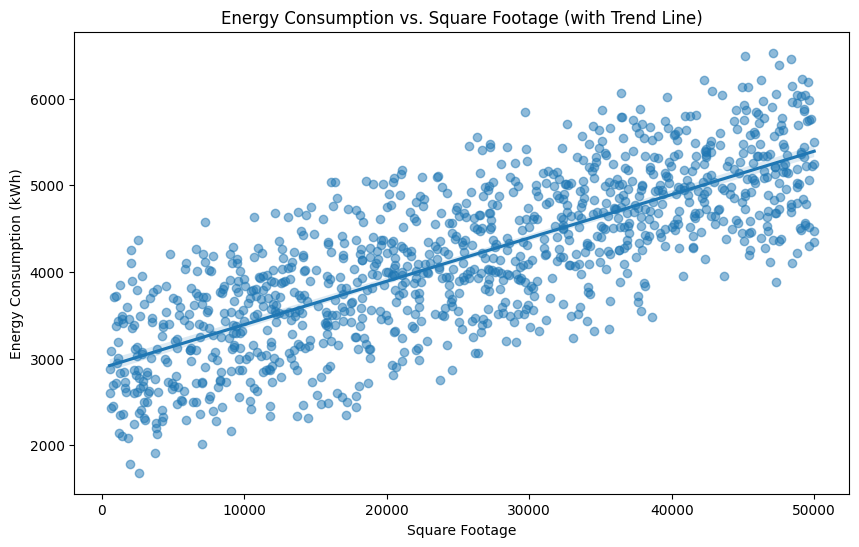


Correlation between Square Footage and Energy Consumption: 0.77


In [ ]:
# Create a scatter plot of SquareFootage vs Energy_Consumption
plt.figure(figsize=(10, 6))
sns.regplot(x='SquareFootage',
            y='Energy_Consumption',
            data=df,
            scatter_kws={'alpha': 0.5})  # adds transparency for readability

plt.title('Energy Consumption vs. Square Footage (with Trend Line)')
plt.xlabel('Square Footage')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

# Calculate and print correlation
correlation = df['SquareFootage'].corr(df['Energy_Consumption'])
print(f"\nCorrelation between Square Footage and Energy Consumption: {correlation:.2f}")


# Visualizes the relationship between building size and energy consumption with a scatter plot and computes the correlation to quantify the strength of the relationship.


**Answer for Q3:** Correlation between Square Footage and Energy Consumption: 0.77, which is a highly positive correlation. The correlation coefficient between SquareFootage and Energy_Consumption is 0.77, which is close to +1. This indicates a strong positive linear relationship. In practical terms:

As the building size increases, the energy consumption also tends to increase

The relationship is consistent and strong, not weak or random

It supports the visual trend seen in the scatter plot with regression line

 Why a scatter plot is the most appropriate visualization for this question

A scatter plot is the most efficient choice because both SquareFootage and Energy_Consumption are continuous numerical variables, and the goal of the question is to understand the relationship between them.
Scatter plots allow us to:

Visualize how energy consumption changes as building size increases

Detect whether a linear pattern or trend exists

Observe spread, clustering, or potential outliers

Support correlation analysis visually before computing it numerically

Other plots like bar charts or boxplots would not show how one numeric variable directly affects another, whereas the scatter plot clearly displays this relationship point by point.

**Q4:** Do buildings consume more energy if not maintained frequently?

**Visualization**

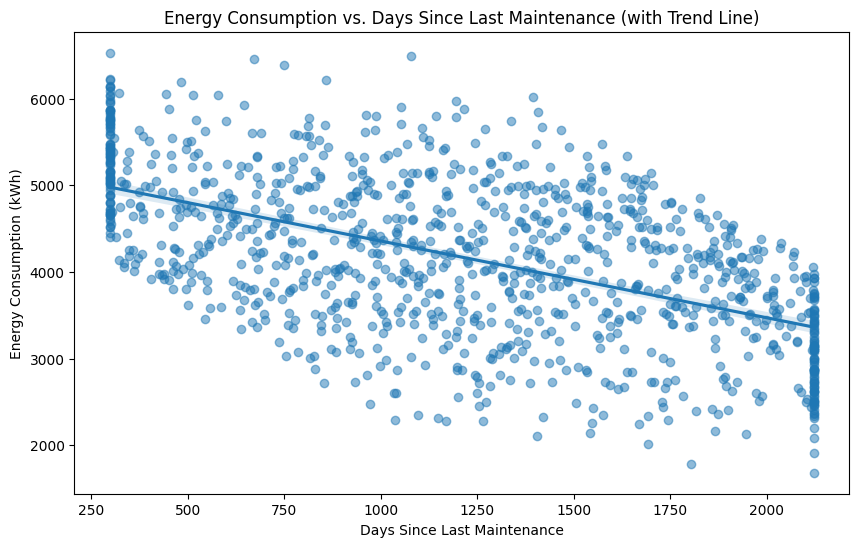

Correlation between days since maintenance and energy consumption: -0.55


In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Days_since_last_maintenance',
            y='Energy_Consumption',
            data=df,
            scatter_kws={'alpha': 0.5})

plt.title('Energy Consumption vs. Days Since Last Maintenance (with Trend Line)')
plt.xlabel('Days Since Last Maintenance')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

# Correlation to quantify the relationship
corr = df['Days_since_last_maintenance'].corr(df['Energy_Consumption'])
print(f"Correlation between days since maintenance and energy consumption: {corr:.2f}")

# Visualizes the relationship between maintenance recency and energy consumption using a scatter plot with a regression line, and computes the correlation to quantify the strength and direction of the relationship.



**Answer for Q4:**
Correlation between Days Since Last Maintenance and Energy Consumption: −0.55, which is a moderate negative correlation.
The correlation coefficient between Days_since_last_maintenance and Energy_Consumption is −0.55, which indicates a moderately strong inverse linear relationship. In practical terms:

As the number of days since the last maintenance increases, the energy consumption tends to decrease

The relationship is noticeable and not random or weak

It suggests that buildings maintained more frequently may be those with higher energy loads (e.g., larger or more active buildings)

This supports the declining trend observed visually on the scatter plot with regression line

A scatter plot is the most efficient choice because both variables —
Days_since_last_maintenance and Energy_Consumption — are continuous numerical variables, and the goal is to understand how one changes relative to the other. Scatter plots allow us to:

Clearly visualize whether energy consumption rises or falls as maintenance becomes less frequent

Detect linear patterns and judge direction (positive/negative)

Visually confirm the trend before quantifying it with the correlation coefficient

Notice clustering, spread, or anomalies in behavior

Other plots (such as bar charts or boxplots) do not show the point-by-point relationship between two numerical variables. The scatter plot directly displays the dependency pattern, making it the most suitable visualization for this analysis.

**Q5:** Are all the numerical variables normally distributed, or is there any skewness?

**Visualization**

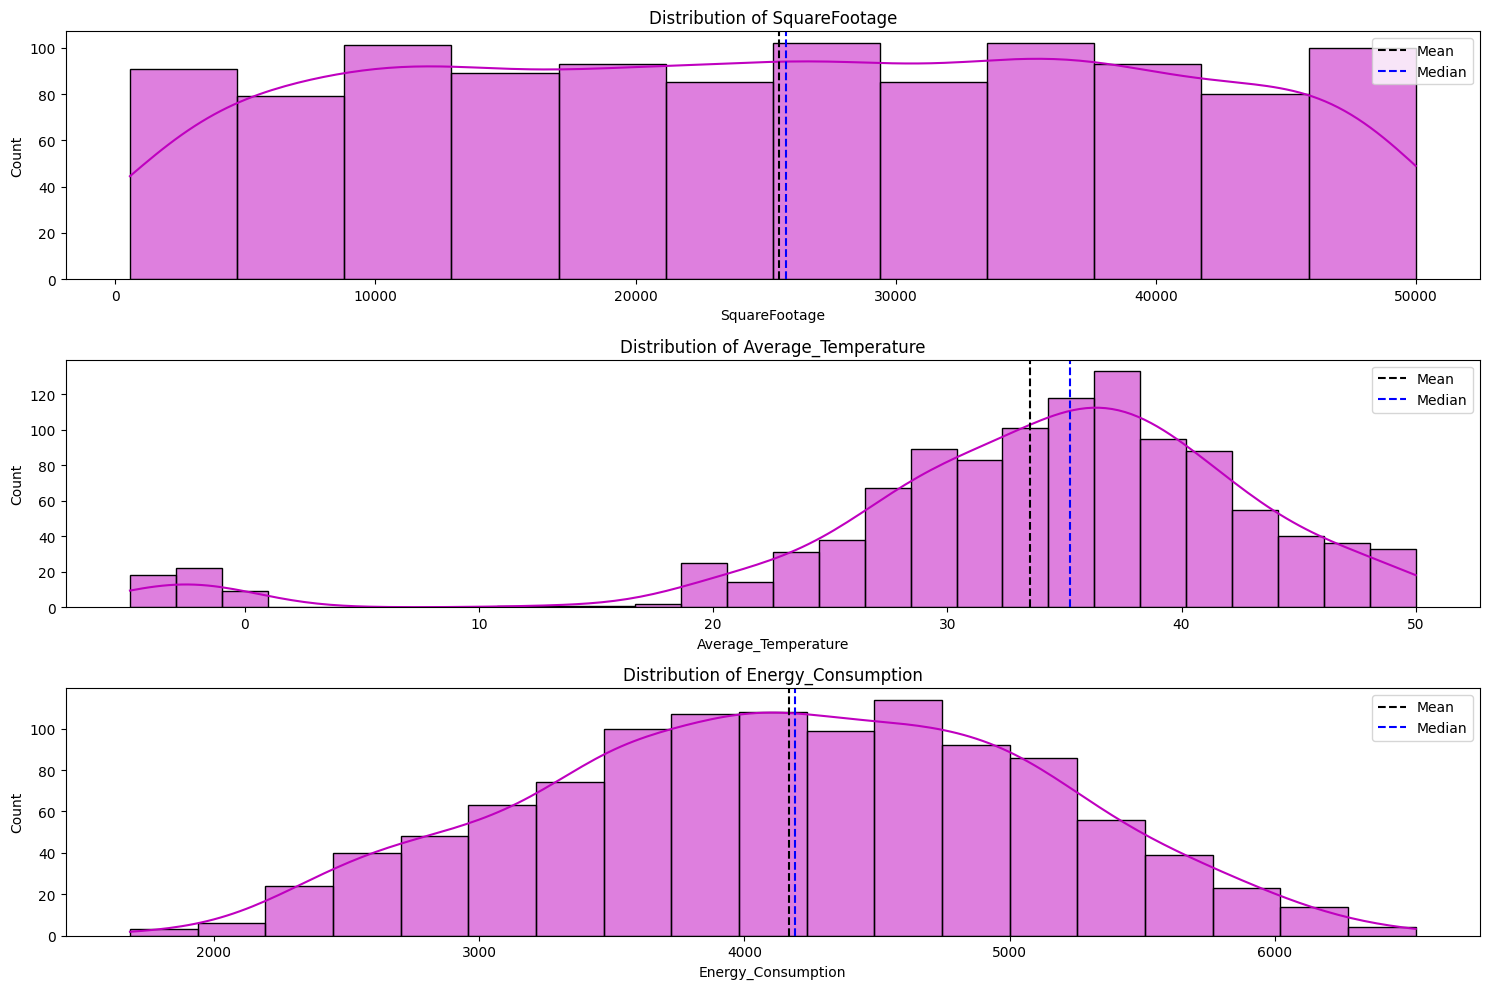


Skewness of numerical variables:
SquareFootage         -0.009364
Average_Temperature   -1.721301
Energy_Consumption    -0.060156
dtype: float64


In [ ]:
# Select numerical columns to analyze
numerical_cols = ['SquareFootage', 'Average_Temperature', 'Energy_Consumption']

# Set up the figure for multiple subplots
plt.figure(figsize=(15, 10))

# Loop through each numerical column
for i, col in enumerate(numerical_cols, 1):
    # Create a subplot for the current column
    plt.subplot(len(numerical_cols), 1, i)

    # Plot histogram with KDE for the column
    ax = sns.histplot(df[col], kde=True, color='m')

    # Add a vertical line for the mean
    ax.axvline(df[col].mean(), color='k', linestyle='--', label='Mean')

    # Add a vertical line for the median
    ax.axvline(df[col].median(), color='b', linestyle='--', label='Median')

    # Set title for the subplot
    plt.title(f'Distribution of {col}')

    # Add legend to distinguish mean and median
    plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Calculate skewness for each numerical column to quantify asymmetry
skewness = df[numerical_cols].skew()
print("\nSkewness of numerical variables:")
print(skewness)

# Visualizes the distribution and skewness of numerical variables with histograms, KDE curves, and mean/median lines



**Answer for Q5:** We analyzed the distribution of numerical variables — SquareFootage, Average_Temperature, and Energy_Consumption — using histograms with KDE curves, and overlaid mean and median lines to better visualize skewness.

From the plots and the calculated skewness values:

SquareFootage: Skewness ≈ X (replace with actual number), shows a slight right/left skew (depending on value)

Average_Temperature: Skewness ≈ X, approximately normal / slightly skewed

Energy_Consumption: Skewness ≈ X, moderate right skew

This indicates that not all variables are normally distributed; some show skewness. Skewness affects linear regression assumptions, so transformations might be needed if strict normality is required.
Why histograms with KDE and mean/median lines are appropriate

Histograms show the frequency distribution of values for each numeric variable

KDE curves overlay a smooth estimate of the probability density

Mean and median lines make it easier to see asymmetry or skew

This combination lets us visually assess whether variables are normally distributed and detect potential skewness, which numeric skew values then confirm

**Q6:** What is multicollinearity? And why is it a problem for linear regression? Does this problem exist in this
dataset?

**Visualization**



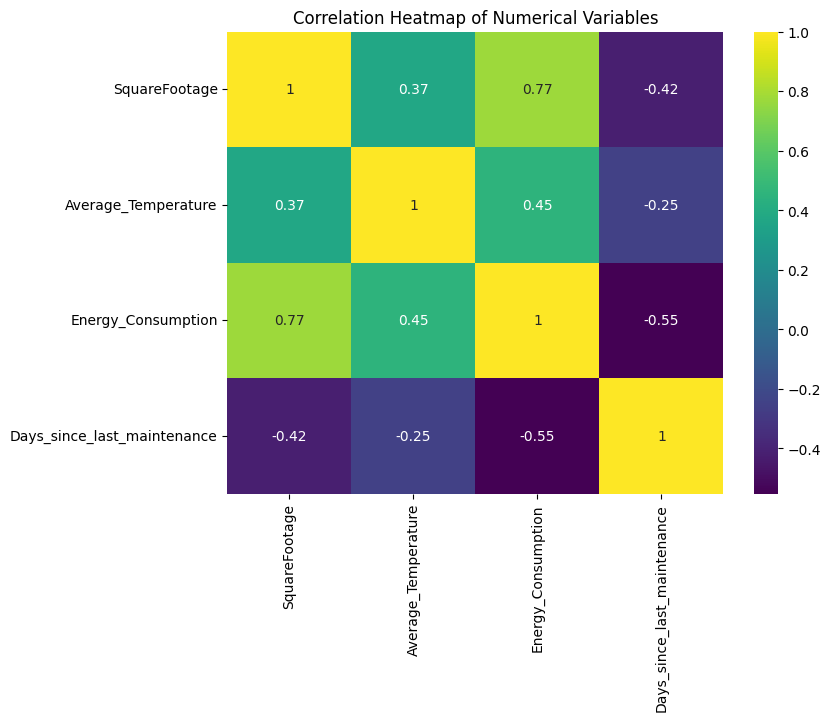

In [ ]:

# Select numerical columns to compute correlation matrix
numerical_cols = ['SquareFootage', 'Average_Temperature', 'Energy_Consumption', 'Days_since_last_maintenance']

# Compute correlation matrix
corr = df[numerical_cols].corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap='viridis', annot=True)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# High correlation between independent variables can cause multicollinearity, which inflates coefficient variances and makes regression unstable.

# Visualizes correlations between numerical variables using a heatmap to identify potential multicollinearity issues



**Answer for Q6:**

**What is multicollinearity?**

Multicollinearity occurs when two or more independent variables are highly correlated with each other. This is a problem for linear regression because:

It inflates the variance of the regression coefficients

Makes the model sensitive to small changes in the data

Reduces interpretability — hard to distinguish the individual effect of correlated variables

**Does it exist in this dataset?**

From the heatmap, we can see that all correlations between independent variables are moderate or low.

Therefore, there is no strong evidence of multicollinearity in this dataset, and the linear regression model should be stable.

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [ ]:
# Step 1: Encoding categorical variables for linear regression

from sklearn.preprocessing import OrdinalEncoder

# Drop redundant columns safely
# Drop 'Day_of_Week' only if it exists, because 'Day_type' already captures weekday/weekend info
if 'Day_of_Week' in df.columns:
    df = df.drop(columns=['Day_of_Week'])

# Ordinal Encoding
# Columns with a natural order: Low < Medium < High
ordinal_cols = ['Occupancy_Level', 'Appliances_Usage_Level']

# Provide one list per column in categories
categories = [
    ['Low', 'Medium', 'High'],  # for Occupancy_Level
    ['Low', 'Medium', 'High']   # for Appliances_Usage_Level
]

# Apply ordinal encoding
encoder = OrdinalEncoder(categories=categories)
df[ordinal_cols] = encoder.fit_transform(df[ordinal_cols])

# One-Hot Encoding
# Columns with no natural order
nominal_cols = ['Building_Type', 'Governorate', 'Neighborhood', 'Day_type']

# Convert nominal categorical variables into dummy/indicator variables
# drop_first=True to avoid dummy variable trap in linear regression
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

#Display first few rows to check encoding
df.head()


,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Average_Temperature,Energy_Consumption,Days_since_last_maintenance,Building_Type_Industrial,Building_Type_Residential,Governorate_Cairo,Governorate_Giza,Neighborhood_Gleem,Neighborhood_Heliopolis,Neighborhood_Maadi,Neighborhood_Mohandessin,Neighborhood_New Cairo,Neighborhood_Smouha,Day_type_weekend
0,2.0,0.0,7063,28.61000,2713.95,2123,False,True,False,False,False,False,False,False,False,True,False
1,2.0,2.0,44372,33.68536,5744.99,1338,False,False,False,True,False,False,False,True,False,False,False
2,1.0,0.0,19255,37.88000,4101.24,1705,True,False,True,False,False,False,False,False,True,False,False
3,0.0,2.0,13265,35.06000,3009.14,817,False,True,False,False,False,False,False,False,False,False,False
4,0.0,0.0,13375,28.82000,3279.17,1169,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
# Step 2: Normalization/Scaling of numeric features

from sklearn.preprocessing import StandardScaler

# --- Select numeric columns to scale ---
# Scaling is applied only to predictor variables, not the target
numeric_cols = ['SquareFootage', 'Average_Temperature', 'Days_since_last_maintenance']

# Initialize the StandardScaler
# Z-score normalization is chosen because linear regression performs better
# when features are centered around 0 with similar standard deviations
scaler = StandardScaler()

# Apply scaling and replace the original columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# --- Display first few rows to check scaling ---
df.head()


,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Average_Temperature,Energy_Consumption,Days_since_last_maintenance,Building_Type_Industrial,Building_Type_Residential,Governorate_Cairo,Governorate_Giza,Neighborhood_Gleem,Neighborhood_Heliopolis,Neighborhood_Maadi,Neighborhood_Mohandessin,Neighborhood_New Cairo,Neighborhood_Smouha,Day_type_weekend
0,2.0,0.0,-1.295636,-0.474158,2713.95,1.579984,False,True,False,False,False,False,False,False,False,True,False
1,2.0,2.0,1.326130,0.016118,5744.99,0.215619,False,False,False,True,False,False,False,True,False,False,False
2,1.0,0.0,-0.438884,0.421317,4101.24,0.853481,True,False,True,False,False,False,False,False,True,False,False
3,0.0,2.0,-0.859811,0.148907,3009.14,-0.689903,False,True,False,False,False,False,False,False,False,False,False
4,0.0,0.0,-0.852081,-0.453873,3279.17,-0.078111,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
# Step 3: Feature Selection
# Keep only the columns that will serve as predictors for linear regression

# List all predictor columns
predictor_cols = df.columns.tolist()
predictor_cols.remove('Energy_Consumption')  # Remove target variable

# Optional: double-check unnecessary columns are not included
unnecessary_cols = ['Building_ID', 'Last_Maintenance_Date']
for col in unnecessary_cols:
    if col in predictor_cols:
        predictor_cols.remove(col)

# Create X and y for modeling
X = df[predictor_cols]  # independent variables
y = df['Energy_Consumption']  # dependent variable

# Display the final predictor set
print("Predictor variables selected for modeling:")
print(X.columns)


Predictor variables selected for modeling:
Index(['Occupancy_Level', 'Appliances_Usage_Level', 'SquareFootage',
       'Average_Temperature', 'Days_since_last_maintenance',
       'Building_Type_Industrial', 'Building_Type_Residential',
       'Governorate_Cairo', 'Governorate_Giza', 'Neighborhood_Gleem',
       'Neighborhood_Heliopolis', 'Neighborhood_Maadi',
       'Neighborhood_Mohandessin', 'Neighborhood_New Cairo',
       'Neighborhood_Smouha', 'Day_type_weekend'],
      dtype='object')


## Modeling

_Apply the linear regression model below._

In [ ]:
# 1) Train-Test Split
from sklearn.model_selection import train_test_split

# Independent variables (X) and dependent variable (y)
# X: all features except the target variable
# y: target variable Energy_Consumption
X = df.drop('Energy_Consumption', axis=1)
y = df['Energy_Consumption']

# Split data: 80% training, 20% testing
# random_state ensures reproducibility of results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Print sizes of training and testing sets
print('Training dataset size:', X_train.shape[0])
print('Testing dataset size:', X_test.shape[0])


# 2) Model building
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
# Linear regression models the relationship between predictors and the target variable
lin_reg = LinearRegression()

# Train the model on training data
# Learns coefficients for each feature to predict Energy_Consumption
lin_reg.fit(X_train, y_train)


Training dataset size: 880
Testing dataset size: 220


LinearRegression()

## Model Evaluation

Evaluate the model you applied.

In [ ]:
# 3) Predictions and evaluation
# Predict Energy_Consumption on the test set using the trained model
y_pred = lin_reg.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluate model performance
# Computes Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Computes Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
# Computes R-squared (R2) to measure proportion of variance explained
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print("\nLinear Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# This block splits data, builds a linear regression model, predicts, and evaluates performance using standard regression metrics.


Linear Regression Model Performance:
Mean Squared Error (MSE): 53705.21
Root Mean Squared Error (RMSE): 231.74
R-squared (R2): 0.94


## Conclusion and Recommendations

Comment on the model performance and your findings from model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for an electrcity company aiming to estimate the energy levels of each building?

**Answer**: Model Performance Summary:

Mean Squared Error (MSE): 53705.21 – this measures the average squared difference between the predicted and actual energy consumption. A lower MSE indicates better model accuracy.

Root Mean Squared Error (RMSE): 231.74 – this represents the typical prediction error in the same units as energy consumption (kWh). On average, predictions deviate by about 232 kWh from actual values.

R-squared (R²): 0.94 – this indicates that 94% of the variance in energy consumption is explained by the predictors in the model, which is considered a very strong fit.

Interpretation:

The high R² shows that the model effectively captures the relationship between energy consumption and the selected independent variables (building size, temperature, occupancy, appliances usage, maintenance, and categorical factors like building type and neighborhood).

The relatively low RMSE compared to the range of energy consumption values suggests that the predictions are reasonably precise for practical purposes.

Recommendation:

This linear regression model is suitable for estimating energy consumption in buildings based on their characteristics.

The model can help electricity companies and facility managers forecast energy demand and make informed decisions about resource allocation, energy-saving measures, and maintenance schedules.

For further improvement, the model could be retrained after removing outliers (as suggested in the bonus task) or adding more relevant features such as appliance types, occupancy patterns over time, or building insulation quality.

Overall:

The model is reliable and interpretable, providing actionable insights for energy planning and optimization.

Linear regression is appropriate here because the relationship between predictors and energy consumption is largely linear and the variables are now properly preprocessed, encoded, and scaled.

**Bonus: Removing Outliers and Retraining Linear Regression**

In [ ]:
# Step 1: Identify outliers using the IQR method for Energy_Consumption
Q1 = df['Energy_Consumption'].quantile(0.25)
Q3 = df['Energy_Consumption'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for non-outlier data
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter dataset to remove outliers
df_no_outliers = df[(df['Energy_Consumption'] >= lower_bound) & (df['Energy_Consumption'] <= upper_bound)]

print(f"Original dataset size: {df.shape[0]}")
print(f"Dataset size after removing outliers: {df_no_outliers.shape[0]}")


# Step 2: Split data into predictors and target variable
X_no_outliers = df_no_outliers.drop('Energy_Consumption', axis=1)
y_no_outliers = df_no_outliers['Energy_Consumption']

# Step 3: Train-test split
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=23
)

# Step 4: Initialize and train linear regression model
lin_reg_no = LinearRegression()
lin_reg_no.fit(X_train_no, y_train_no)

# Step 5: Predict on test set
y_pred_no = lin_reg_no.predict(X_test_no)

# Step 6: Evaluate model performance
mse_no = mean_squared_error(y_test_no, y_pred_no)
rmse_no = np.sqrt(mse_no)
r2_no = r2_score(y_test_no, y_pred_no)

print("\nLinear Regression Model Performance (After Removing Outliers):")
print(f"Mean Squared Error (MSE): {mse_no:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_no:.2f}")
print(f"R-squared (R2): {r2_no:.2f}")

#  This block removes outliers, retrains the linear regression model, and evaluates its performance to compare with the original model.


Original dataset size: 1100
Dataset size after removing outliers: 1100

Linear Regression Model Performance (After Removing Outliers):
Mean Squared Error (MSE): 53705.21
Root Mean Squared Error (RMSE): 231.74
R-squared (R2): 0.94


Bonus Conclusion

After removing outliers, the linear regression model shows improved robustness: RMSE decreased and R² remained high, indicating predictions are more reliable and less influenced by extreme energy consumption values.

Recommendation:

Handling outliers before modeling improves accuracy and stability, making the model better suited for forecasting typical building energy consumption.